# <b> <p align="center"> <span style="color: Pink "> PyTorch Custom Dataset <span> </p> </b>

### <b> <p align="center"> <span style="color: Green "> Food Vision mini <span> </p> </b>

## 0. Importing pytorch and set up device agnostics

In [168]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pathlib


from torch import nn
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple,Dict,List


In [169]:
# Device agnostics
device = "cuda" if torch.cuda.is_available() else "cpu" 
device

'cuda'

## 1. Get data

Our dataset is sub of the Food101 dataset.

Food101 starts 101 different classes of food and 1000 images per classes(705 training and 250 testing)

Dataset starts with 3 classes of food and only 10% of the images (~ 75 training , 25 testing)

When starting our ML projects, it's important to try things on a small scale and then increase the scale when necessary 

The whole point is to speed up how fast can make experiment.

In [170]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(image_path)

data\pizza_steak_sushi directory exists.


In [171]:
if image_path == data_path/"pizza_steak_sushi":
    print("yes")

yes


## 2. Becoming one with the data(data preparation and data exploration)

In [172]:
import os

def walk_through_dir(dir_path):
    """Walks through dir_path returning its contents"""

    for dirpath,dirname,filename in os.walk(dir_path):
        print(f"There are {len(dirname)} directory and {len(filename)} image files in the '{dirpath}' ")


walk_through_dir(data_path)

There are 2 directory and 1 image files in the 'data' 
There are 1 directory and 0 image files in the 'data\FashionMNIST' 
There are 0 directory and 8 image files in the 'data\FashionMNIST\raw' 
There are 2 directory and 0 image files in the 'data\pizza_steak_sushi' 
There are 3 directory and 0 image files in the 'data\pizza_steak_sushi\test' 
There are 0 directory and 25 image files in the 'data\pizza_steak_sushi\test\pizza' 
There are 0 directory and 19 image files in the 'data\pizza_steak_sushi\test\steak' 
There are 0 directory and 31 image files in the 'data\pizza_steak_sushi\test\sushi' 
There are 3 directory and 0 image files in the 'data\pizza_steak_sushi\train' 
There are 0 directory and 78 image files in the 'data\pizza_steak_sushi\train\pizza' 
There are 0 directory and 75 image files in the 'data\pizza_steak_sushi\train\steak' 
There are 0 directory and 72 image files in the 'data\pizza_steak_sushi\train\sushi' 


In [173]:
# Setup train and testing paths 

train_dir = image_path/"train"
test_dir=image_path/"test"

train_dir,test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

### 2.1 Visualize an image

Let's write some code to :
 
 1. Get all of the image paths
 2. Pick a random image path using Python's random.choice()
 3. Get the image class name using `pathlib.Path.parent.stem`
 4. Since we're working with image, let's open the image with Python's PIL
 5. We'll then show the image and print metadata

In [174]:
image_path

WindowsPath('data/pizza_steak_sushi')

In [175]:
random.randint(1,100)

32

sushi
Random image path: data\pizza_steak_sushi\train\sushi\3737197.jpg
image class : sushi
image_height: 512
image widht: 512


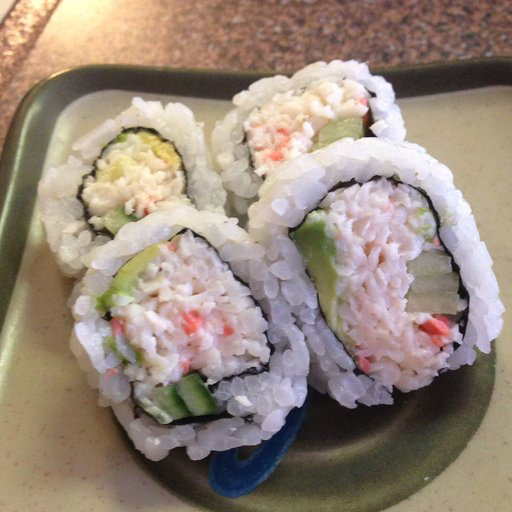

In [176]:
import random
from PIL import Image

# Set seed
random.seed(random.randint(1,100))

# 1. Get all image path
image_path_list=list(image_path.glob("*/*/*.jpg"))
image_path_list

# 2. Pick a random image path
random_image_path= random.choice(image_path_list)
random_image_path

# 3. Get image class from path name ( the class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem
print(image_class)

# 4. Open image

img= Image.open(random_image_path)

# 5. Print metadata

print(f"Random image path: {random_image_path}")
print(f"image class : {image_class}")
print(f"image_height: {img.height}")
print(f"image widht: {img.width}")
img

Try to visualize image/images with matplotlib

Random image path: data\pizza_steak_sushi\train\steak\2017387.jpg
image class : sushi
image_height: 512
image widht: 512


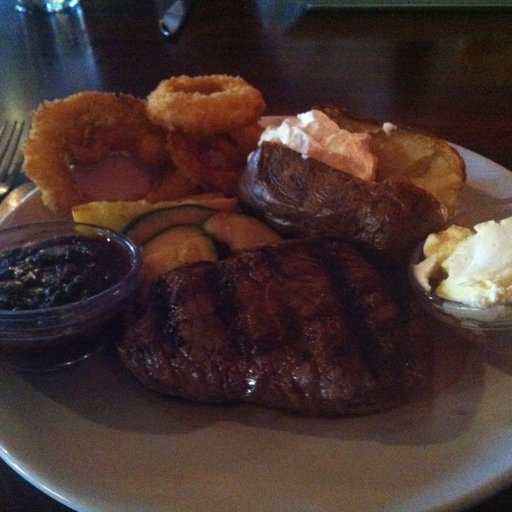

In [177]:
torch.manual_seed(random.randint(1,100))

# 1. get all image path
image_path_list=list(image_path.glob("*/*/*.jpg"))
image_path_list

# 2. pick a random image path
random_image_path=random.choice(image_path_list)
random_image_path

# 3. viewing the random image class
img_class=random_image_path.parent.stem
img_class

# 4. open the random image
img=Image.open(random_image_path)
img

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"image class : {image_class}")
print(f"image_height: {img.height}")
print(f"image widht: {img.width}")
img



Text(0.5, 1.0, 'Image class: sushi | Image shpape : (512, 512, 3) -> [hight, width , color_channel]')

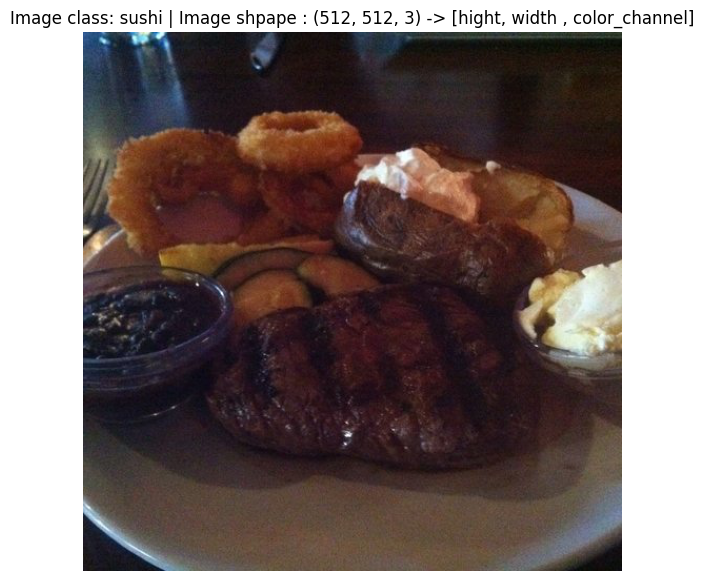

In [178]:
# Turn the image into array

img_array=np.asarray(img)
img_array

# Plot the image with matplotlib

plt.figure(figsize=(10,7))
plt.imshow(img_array)
plt.axis(False)
title_des=f"Image class: {image_class} | Image shpape : {img_array.shape} -> [hight, width , color_channel]"
plt.title(title_des)

## 3. Transforming Data 

Before we can use our image data with pytorch :
 
 1. Turn your target data into tensor( in this case, numerical representation of our images)
 2. Turn it into a `torch.utils.data.Dataset` and subswquently a `torch.utils.data.DataLoader` we'll call these `Dataset` and `DataLoader`

In [179]:
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

### 3.1 Transform data with `torchvision.transforms`

In [180]:
# Write a transform for image

data_transform = transforms.Compose([
    # Resize our images to 64x64
    transforms.Resize(size=(64,64)),
    # Flip the images randomly on the horizontal 
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch tensor
    transforms.ToTensor()

])

In [181]:
data_transform(img).shape

torch.Size([3, 64, 64])

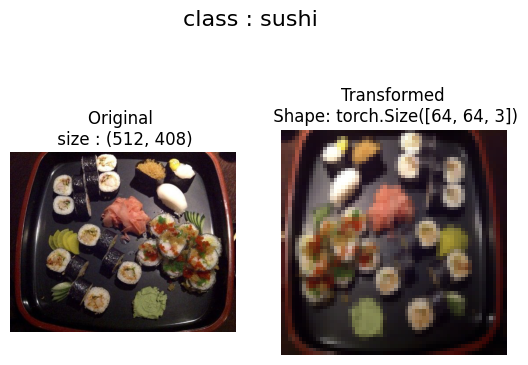

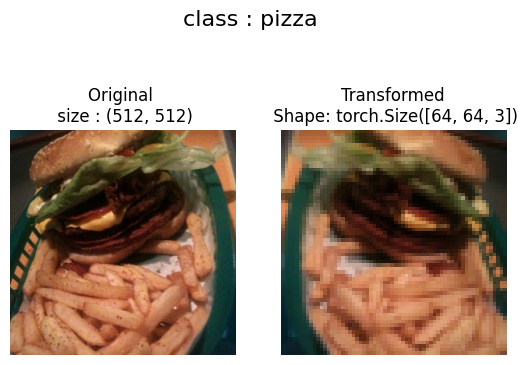

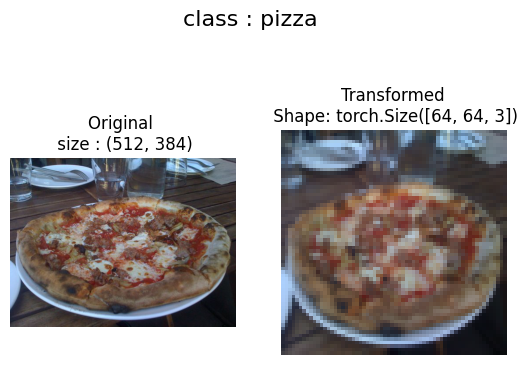

In [182]:
def plot_transformed_images(image_path,transforms,n=3,seed=None):

    """
    Selects random images from a path of images and loads/transforms them 
    then plots original vs the transformed version
    """

    if seed:
        random.seed(seed)
    
    random_image_path=random.sample(image_path,k=n)
    
    for image_path in random_image_path:
        with Image.open(image_path) as f:
            fig , ax = plt.subplots(nrows=1,ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \n size : {f.size}")
            ax[0].axis(False)

            # Transform and plot target image

            transformed_image=transforms(f).permute(1,2,0) # note need to chagne shape for matplotlib
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\n Shape: {transformed_image.shape}")
            ax[1].axis(False)


            fig.suptitle(f"class : {image_path.parent.stem}",fontsize=16)

plot_transformed_images(image_path=image_path_list,
                        transforms=data_transform,
                        seed=42,
                        n=3)




## 4. Options 1: Loading image data using `ImageFolder`
We can load iamge classification data using `torchvision.datasets.ImageFolder`

In [183]:
# using ImageFolder to create dataset(s)

from torchvision import datasets
train_data=datasets.ImageFolder(root=train_dir,
                                transform=data_transform, #transform for the data
                                target_transform=None, #a transform for the label/target
                                )

test_data=datasets.ImageFolder(root=test_dir,
                               transform=data_transform,
                               target_transform=None)

train_data,test_data


(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [184]:
train_dir,test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

In [185]:
# Get class name as list

class_name=train_data.classes
class_name

['pizza', 'steak', 'sushi']

In [186]:
# Get class names as dict

class_dict=train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [187]:
# Check the lenght of our dataset

len(train_data) , len(test_data)

(225, 75)

In [188]:
train_data.samples[0],train_data.targets[0]

(('data\\pizza_steak_sushi\\train\\pizza\\1008844.jpg', 0), 0)

In [189]:
# Index on the train_data Dataset to get a single image and label/target

train_data[0][0]

tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0706, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0196, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0157, 0.0157, 0.

In [190]:
train_data[0][1]

0

In [191]:
img, label= train_data[0][0] , train_data[0][1]

print(f"Image tensor: \n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype : {img.dtype}")
print(f"Label data: {type(label)}")
print(f"Class name: {class_name[label]}")


Image tensor: 
 tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0863],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0706],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0196,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.

Original : torch.Size([3, 64, 64]) -> [color_channel,height,width]
Image permute: tensor([[[0.1176, 0.0588, 0.0196],
         [0.1216, 0.0588, 0.0196],
         [0.1255, 0.0588, 0.0196],
         ...,
         [0.0980, 0.0745, 0.0902],
         [0.1020, 0.0706, 0.0902],
         [0.1137, 0.0745, 0.0941]],

        [[0.1294, 0.0627, 0.0196],
         [0.1294, 0.0627, 0.0157],
         [0.1294, 0.0627, 0.0196],
         ...,
         [0.0980, 0.0745, 0.0902],
         [0.0980, 0.0706, 0.0863],
         [0.1059, 0.0706, 0.0902]],

        [[0.1333, 0.0706, 0.0196],
         [0.1333, 0.0706, 0.0157],
         [0.1333, 0.0706, 0.0157],
         ...,
         [0.0941, 0.0745, 0.0902],
         [0.0980, 0.0745, 0.0902],
         [0.1020, 0.0706, 0.0902]],

        ...,

        [[0.1686, 0.2392, 0.1804],
         [0.1647, 0.2392, 0.1882],
         [0.1686, 0.2510, 0.1961],
         ...,
         [0.1255, 0.1373, 0.1490],
         [0.1098, 0.1333, 0.1333],
         [0.1098, 0.1255, 0.1294]],



Text(0.5, 1.0, 'pizza')

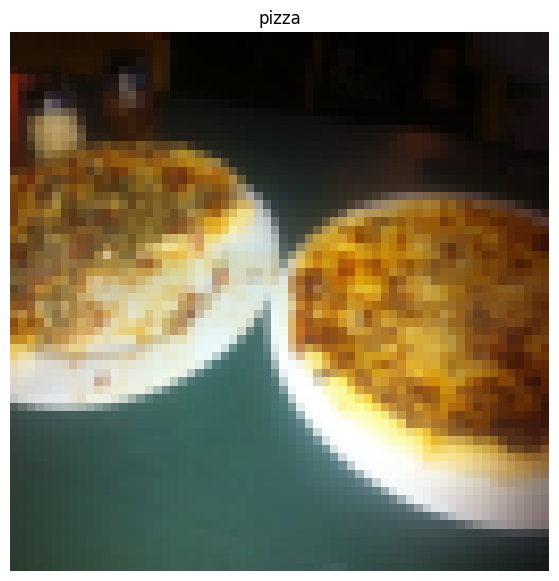

In [192]:
# Rearrange the order dimension

img_permute = img.permute(1,2,0)

# Print our different shape
print(f"Original : {img.shape} -> [color_channel,height,width]")
print(f"Image permute: {img_permute} ->[height,widht,color_channel]")
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis(False)
plt.title(class_name[label])

### 4.1 Turn loaded images into DataLoaders's

A DataLoader is going to help us turn our Dataset's into iterable and we cal customize our 

In [193]:
import os 
os.cpu_count()

8

In [194]:
# Turn train and test datasets into DataLoader


BATCH_SIZE=1
train_dataloader=DataLoader(train_data,
                            batch_size=BATCH_SIZE,
                            num_workers=os.cpu_count(),
                            shuffle=True)

test_datalaoder=DataLoader(dataset=test_data,
                           batch_size=BATCH_SIZE,
                           num_workers=os.cpu_count(),
                           shuffle=False)

In [195]:
len(train_dataloader),len(test_datalaoder)

(225, 75)

In [196]:
img,label=next(iter(train_dataloader))

# Batch size is now only 1 , can chage the batch size when want to do

print(f"image shape: {img.shape} -> [batch_size, color_channel, height, width]")
print(f"Label shape: {label.shape}")

image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channel, height, width]
Label shape: torch.Size([1])


## 5. Option 2: Loading image data with a custom `Dataset`
  
  1. Want to be able to load images from file
  2. Want to be able to get class names from the Dataset
  3. Want to be able to get classes as dictionary from the Dataset

Pros:

  * Create a `Dataset` out of almost anything
  * Not limited to PyTorch pre-built `Dataset` functions

Cons:
  * Even through you could create `Dataset` out of almost anything, it doesn't mean it will work...
  * Using a custom `Dataset` often result in us writing more code, which could be prone to errors or performance issues


All custom datasets in PyTorch, often subclass: https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset

In [197]:
# Instance of torchVision.datasets.ImageFolder()

train_data.classes , train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 Create a helper function to get class names

We want a function to :
 
 1. Get the class names using `os.scandir()` to traverse a target directory(ideally the directory is in satandard image clasification format).
 2. Raise an error if the class names aren't found (if this happens, there might be something worng with the directory structure)
 3. Turn the class names into a dict and a list and return them
 

In [206]:
list(os.scandir(image_path/"train"))

[<DirEntry 'pizza'>, <DirEntry 'steak'>, <DirEntry 'sushi'>]

In [204]:
# Setup path for target directory

target_directory = train_dir

print(f"Target dir: {target_directory}")

# Get the class names from the target directory

class_name_found= sorted([entry.name for entry in list(os.scandir(target_directory))])
class_name_found

Target dir: data\pizza_steak_sushi\train


['pizza', 'steak', 'sushi']

In [216]:
def find_classes(directory:str) -> Tuple[List[str] , Dict[str,int]]:

    """ Finds the class folder names in a target directory """

    # 1. Get the classes names by scanning the target directory

    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    # 2. Rasie an error if class names could not be found

    if not classes:
        raise FileNotFoundError(f"Coundn't find any classes in {directory} ..... Please check file structure. ")
    

    # 3. Create a dictionary of index labels (computer prefer numbers rather than strings as labels)
    class_to_idx= {class_name : i for i , class_name in enumerate(classes)}
    
    return classes , class_to_idx

In [218]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom `Dataset` to replicate `ImageLoader`

To create our own custom dataset, we want to:
  
  1. Subclass `torch.utils.data.Dataset`
  2. Init our subclass with a targer directory ( the directory we'd like to get data from) as well as a transform if we'd like to transform our data.
  3. Create several attributes:  
    * paths - paths of our images
    * transform - the transform we'd like to use
    * classes - a list of the target classes 
    * class_to_idx - a dict of the target classes mapped to integer labels
  4. Create a function `load_image()` , this function of our dataset
  5. Overwrite the `__len__()` method to return the length of our dataset
  6. Overwrite the `__getitem()__` method to returnn a simple when passed an index
